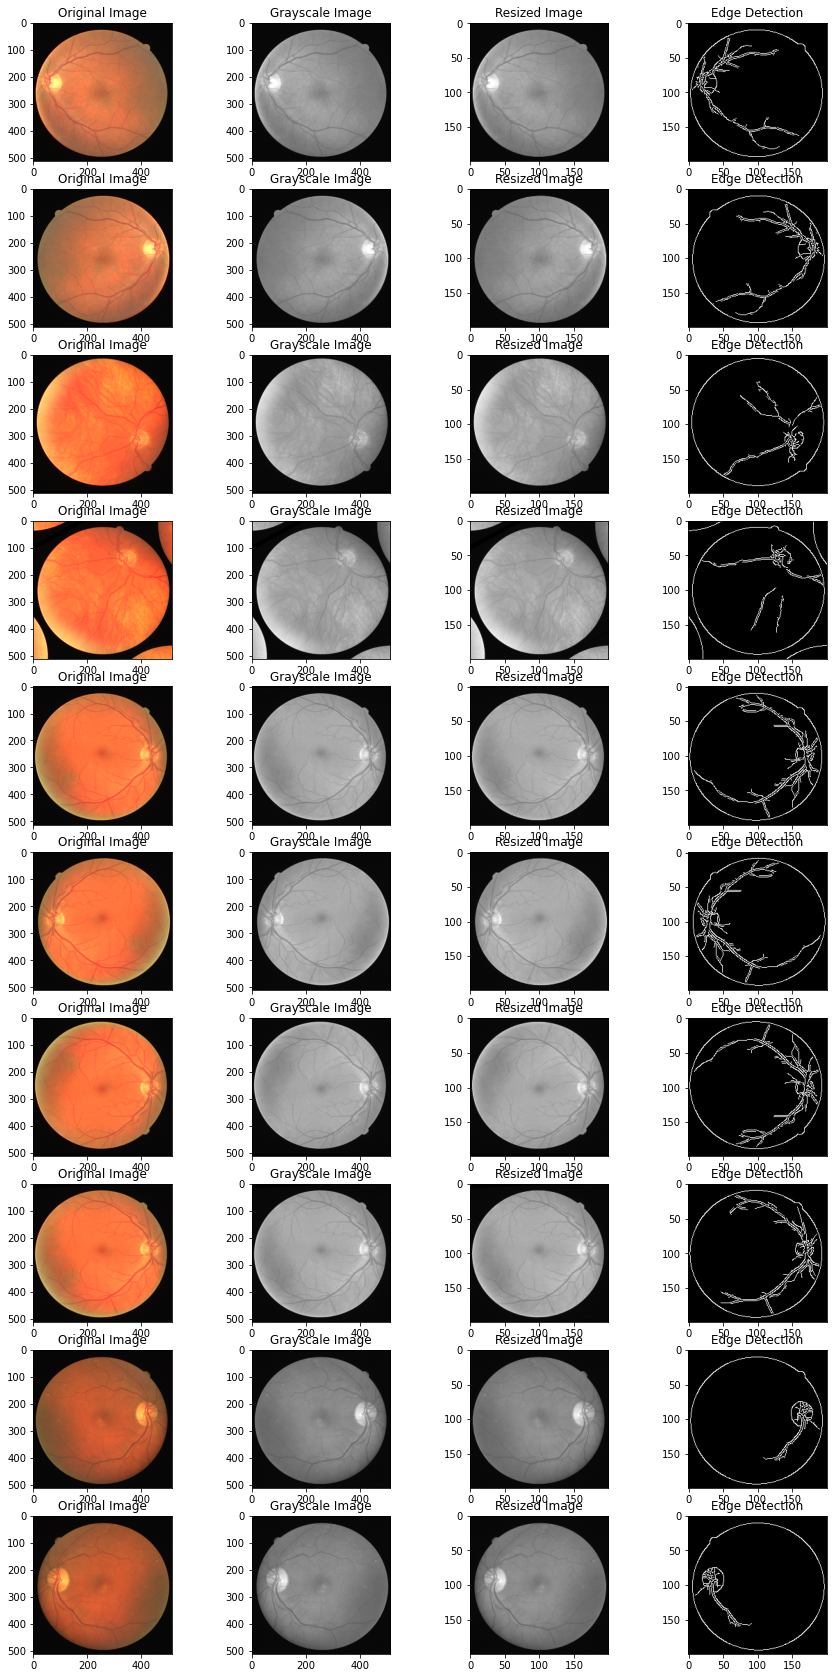

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

dataset_path = 'C:\\Users\\DELL\\Desktop\\Data\\train\\image'
image_files = os.listdir(dataset_path)
num_images = min(10, len(image_files))
plt.figure(figsize=(15, 3 * num_images))
for image_index in range(num_images):
    image_file = image_files[image_index]
    image_path = os.path.join(dataset_path, image_file)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (200, 200))
    edges = cv2.Canny(resized_image, 50, 150)
    plt.subplot(num_images, 4, image_index * 4 + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(num_images, 4, image_index * 4 + 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.subplot(num_images, 4, image_index * 4 + 3)
    plt.imshow(resized_image, cmap='gray')
    plt.title('Resized Image')
    plt.subplot(num_images, 4, image_index * 4 + 4)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
plt.show()


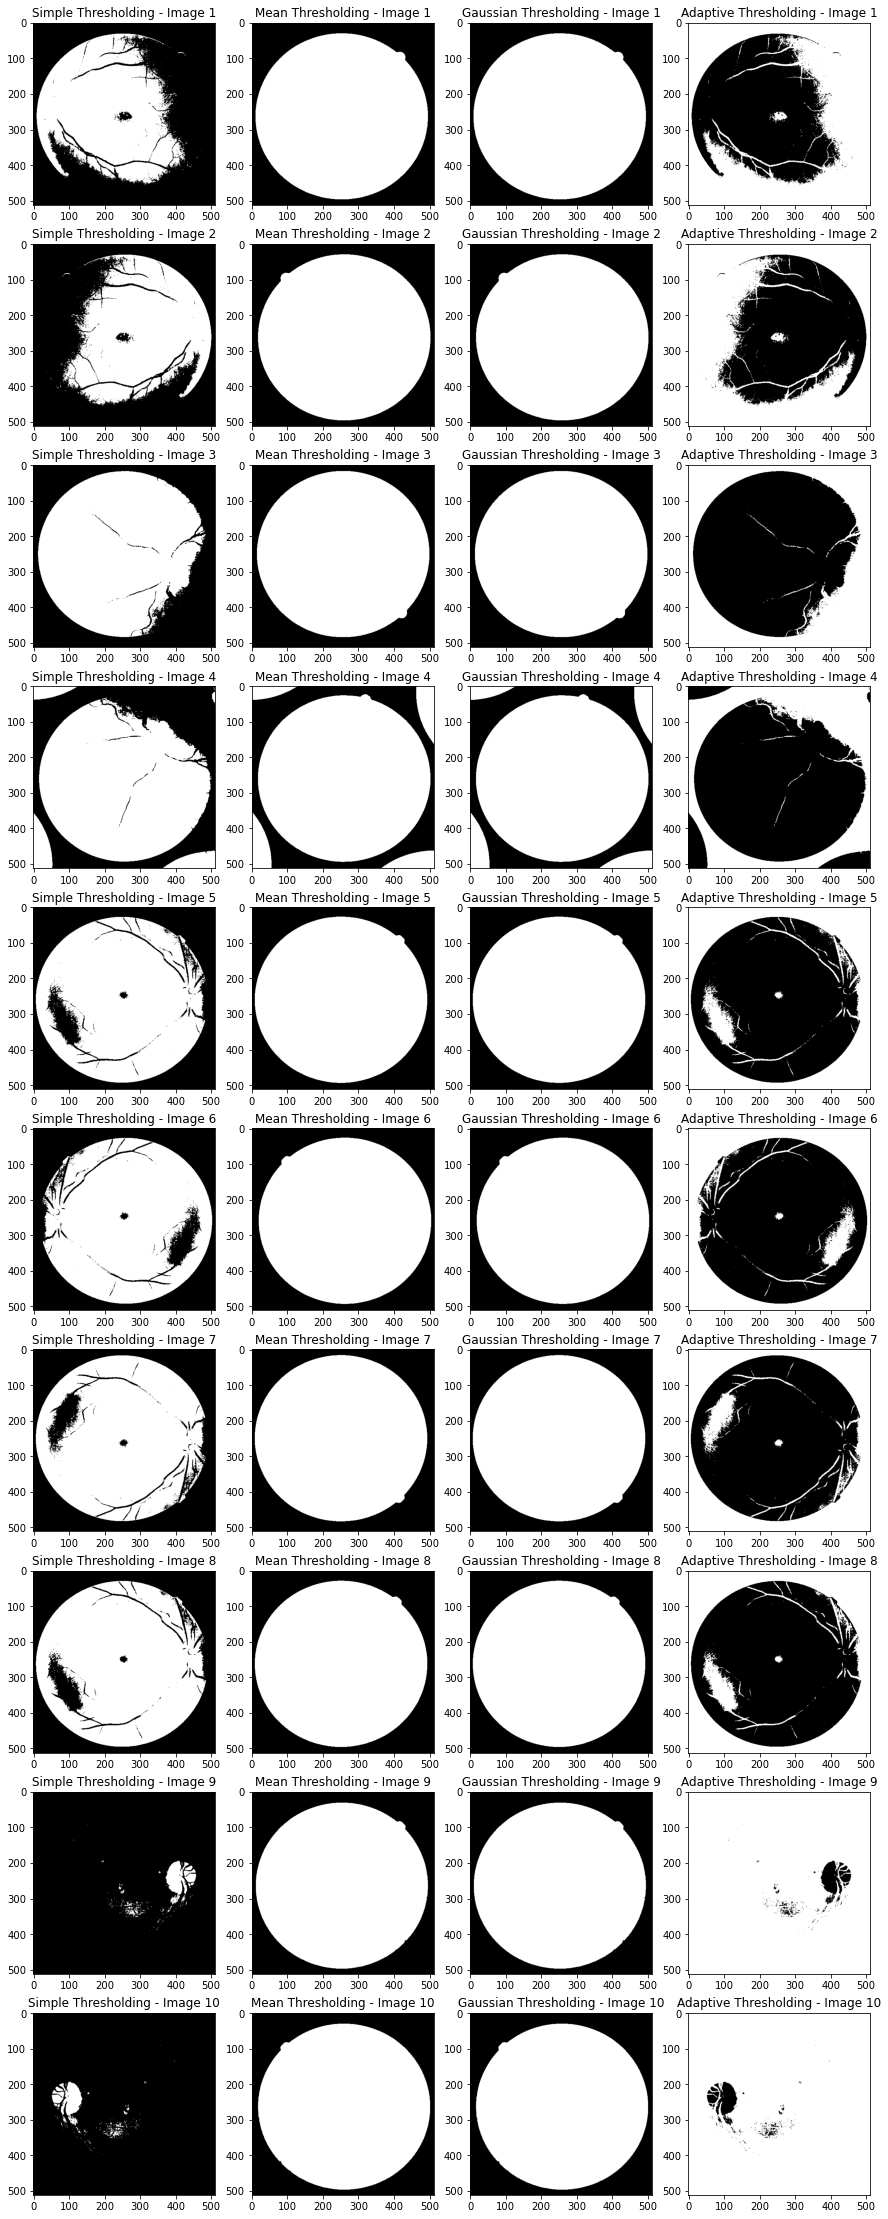

In [ ]:
image_files = os.listdir(dataset_path)
num_images = min(10, len(image_files))
thresholding_techniques = {
    "Simple Thresholding": cv2.THRESH_BINARY,
    "Mean Thresholding": cv2.THRESH_BINARY | cv2.THRESH_OTSU,
    "Gaussian Thresholding": cv2.THRESH_BINARY | cv2.THRESH_OTSU,
    "Adaptive Thresholding": cv2.ADAPTIVE_THRESH_GAUSSIAN_C
}
plt.figure(figsize=(15, 4 * num_images))
for image_index in range(num_images):
    image_file = image_files[image_index]
    image_path = os.path.join(dataset_path, image_file)
    image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    for i, (technique_name, technique_flag) in enumerate(thresholding_techniques.items()):
        _, thresholded_image = cv2.threshold(gray_image, 128, 255, technique_flag)
        plt.subplot(num_images, len(thresholding_techniques), image_index * len(thresholding_techniques) + i + 1)
        plt.imshow(thresholded_image, cmap='gray')
        plt.title(f'{technique_name} - Image {image_index + 1}')
plt.show()

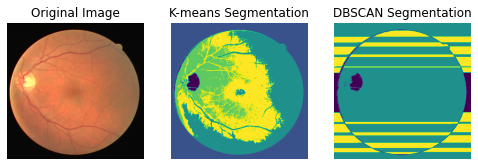

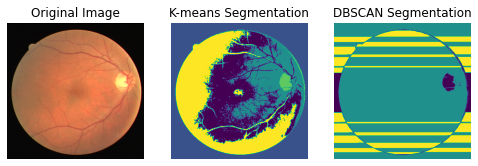

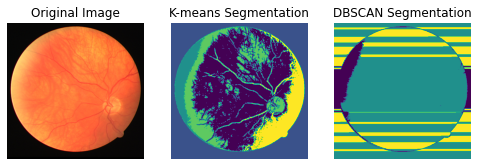

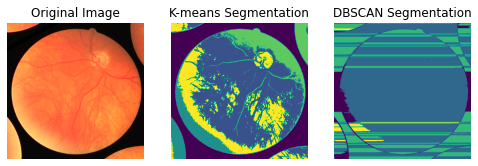

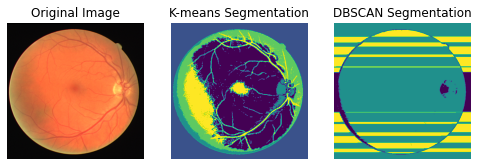

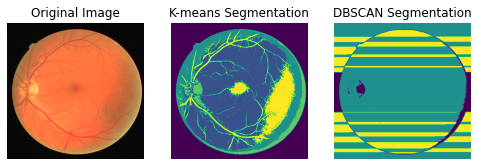

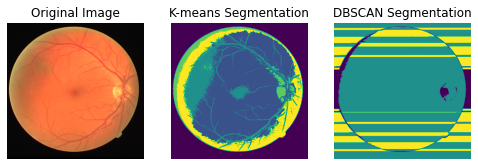

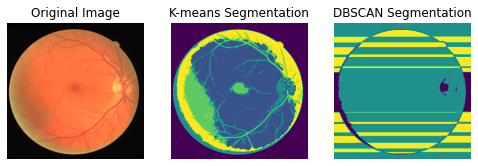

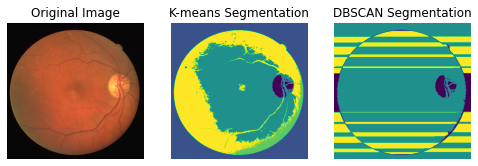

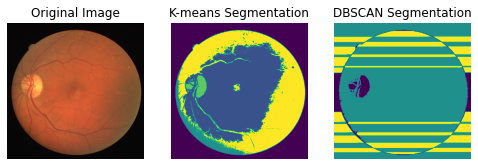

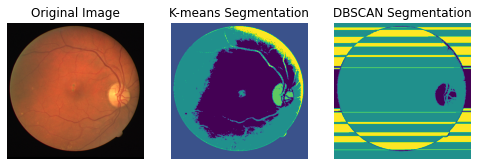

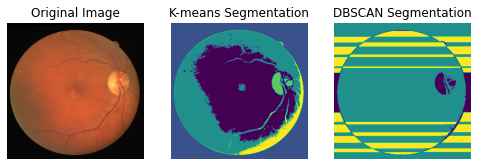

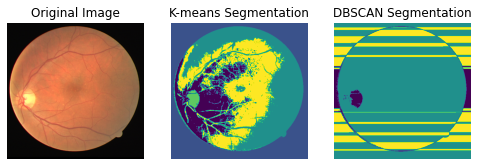

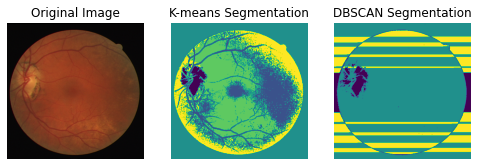

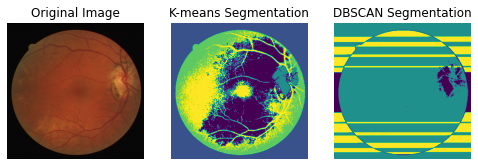

In [ ]:
num_images = min(15, len(image_files))

for i in range(num_images):
    file_path = os.path.join(dataset_path, image_files[i])
    image = cv2.imread(file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    feature_vectors = image_rgb.reshape((-1, 3))

    scaler = StandardScaler()
    feature_vectors_scaled = scaler.fit_transform(feature_vectors)

    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans_labels = kmeans.fit_predict(feature_vectors_scaled)
    kmeans_segmented_image = kmeans_labels.reshape(image_rgb.shape[:2])

    dbscan = DBSCAN(eps=0.5, min_samples=100)

    batch_size = 1000
    num_batches = int(np.ceil(len(feature_vectors_scaled) / batch_size))

    for batch_num in range(num_batches):
        start_idx = batch_num * batch_size
        end_idx = (batch_num + 1) * batch_size

        batch_feature_vectors = feature_vectors_scaled[start_idx:end_idx, :]

        dbscan_labels_batch = dbscan.fit_predict(batch_feature_vectors)

        if batch_num == 0:
            dbscan_labels = dbscan_labels_batch
        else:
            dbscan_labels = np.concatenate((dbscan_labels, dbscan_labels_batch))

    dbscan_segmented_image = dbscan_labels.reshape(image_rgb.shape[:2])

    plt.figure(figsize=(20, 6))

    plt.subplot(1, 7, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 7, 2)
    plt.imshow(kmeans_segmented_image, cmap='viridis')
    plt.title('K-means Segmentation')
    plt.axis('off')

    plt.subplot(1, 7, 3)
    plt.imshow(dbscan_segmented_image, cmap='viridis')
    plt.title('DBSCAN Segmentation')
    plt.axis('off')

    plt.show()
